### Data Collection and Analysis using Python GUI

Summary Statistics:
                 ID        Age        Salary  Performance Score  Phone Number
count     21.000000  21.000000     21.000000          21.000000  2.100000e+01
mean   10541.904762  25.476190  41952.380952           3.714286  9.047928e+09
std      233.235912   2.657424  11766.376632           0.830232  6.672751e+08
min    10124.000000  21.000000  23000.000000           2.000000  7.453346e+09
25%    10365.000000  24.000000  32000.000000           3.000000  8.765590e+09
50%    10497.000000  26.000000  40000.000000           4.000000  8.977756e+09
75%    10767.000000  28.000000  50000.000000           4.000000  9.775544e+09
max    10897.000000  29.000000  68000.000000           5.000000  9.876253e+09


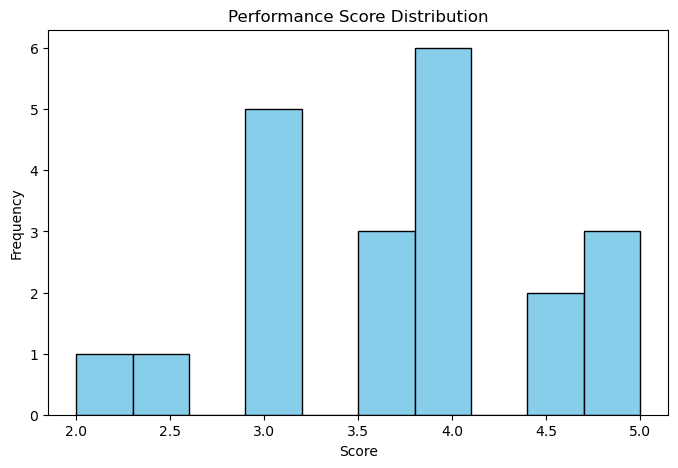

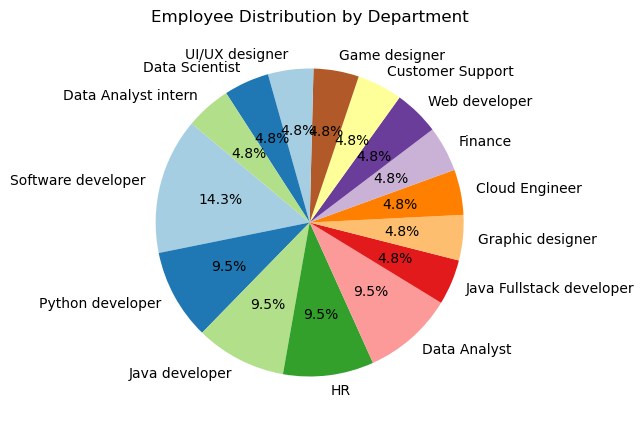

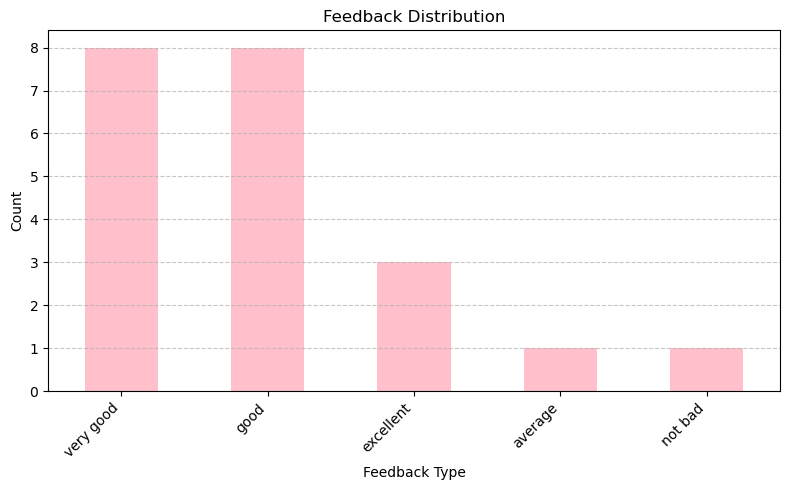

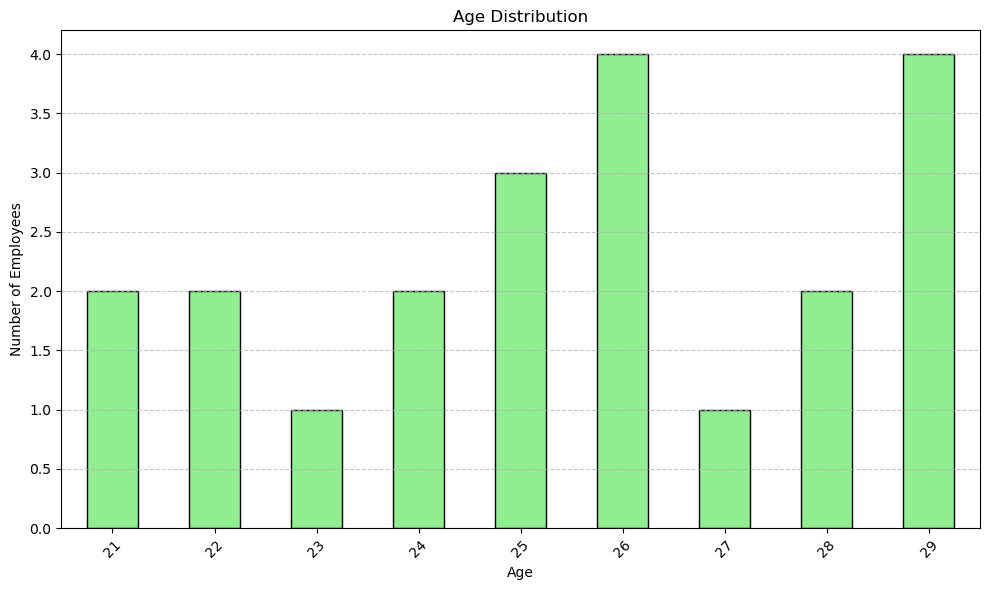

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import os
import matplotlib.pyplot as plt

excel_file = "C:/Users/19uka/Downloads/PYTHON.xlsx"

def save_to_excel():
    try:
        if not entry_age.get().isdigit() or not entry_salary.get().isdigit() or not entry_performance_score.get().isdigit():
            messagebox.showerror("Validation Error", "Age, Salary, and Performance Score must be numeric.")
            return

        data = {
            "ID": entry_id.get(),
            "Name": entry_name.get(),
            "Age": int(entry_age.get()),
            "Gender": entry_gender.get(),
            "Salary": float(entry_salary.get()),
            "City": entry_city.get(),
            "Department": entry_department.get(),
            "Date of Joining": entry_date_of_joining.get(),
            "Performance Score": int(entry_performance_score.get()),
            "Feedback": entry_feedback.get(),
            "Phone Number": entry_phone_num.get(),
            "Email ID": entry_email_id.get(),
        }
        
        df = pd.DataFrame([data])
        
        if not os.path.exists(excel_file):
            df.to_excel(excel_file, index=False)  
        else:
            existing_data = pd.read_excel(excel_file)
            updated_data = pd.concat([existing_data, df], ignore_index=True)
            updated_data.to_excel(excel_file, index=False) 
        
        messagebox.showinfo("Success", "Data saved successfully!")
        clear_entries()

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

def clear_entries():
    entry_id.delete(0, tk.END)
    entry_name.delete(0, tk.END)
    entry_age.delete(0, tk.END)
    entry_gender.delete(0,tk.END)
    entry_salary.delete(0, tk.END)
    entry_city.delete(0, tk.END)
    entry_department.delete(0, tk.END)
    entry_date_of_joining.delete(0, tk.END)
    entry_performance_score.delete(0, tk.END)
    entry_feedback.delete(0, tk.END)
    entry_phone_num.delete(0, tk.END)
    entry_email_id.delete(0, tk.END)

def analyze_data():
    try:
        if not os.path.exists(excel_file):
            messagebox.showerror("Error", "No data file found!")
            return
        
        df = pd.read_excel(excel_file)
        print("Summary Statistics:")
        print(df.describe())

        plt.figure(figsize=(8, 5))
        df["Performance Score"].plot(kind="hist", bins=10, color="skyblue", edgecolor="black")
        plt.title("Performance Score Distribution")
        plt.xlabel("Score")
        plt.ylabel("Frequency")
        plt.show()

        if "Department" in df.columns:
            department_counts = df["Department"].value_counts()
            plt.figure(figsize=(8, 5))
            department_counts.plot.pie(autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
            plt.title("Employee Distribution by Department")
            plt.ylabel("") 
            plt.show()
        else:
            messagebox.showerror("Error", "No 'Department' column found in the data.")
        
        if "Feedback" in df.columns:
            feedback_counts = df["Feedback"].value_counts()
            plt.figure(figsize=(8, 5))
            feedback_counts.plot(kind="bar", color="pink")
            plt.title("Feedback Distribution")
            plt.xlabel("Feedback Type")
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.grid(axis='y', linestyle='--', alpha=0.7) 
            plt.show()
        else:
            messagebox.showerror("Error", "No 'Feedback' column found in the data.")

        if "Age" in df.columns:
            plt.figure(figsize=(10, 6))
            df["Age"].value_counts().sort_index().plot(kind="bar", color="lightgreen", edgecolor="black")
            plt.title("Age Distribution")
            plt.xlabel("Age")
            plt.ylabel("Number of Employees")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.grid(axis='y', linestyle='--', alpha=0.7)  
            plt.show()
        else:
            messagebox.showerror("Error", "No 'Age' column found in the data.")

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

root = tk.Tk()
root.title("Employee Data Collection")
root.geometry("500x700") 

def draw_gradient(canvas, colors, width, height):
    section_height = height // len(colors)
    for i, color in enumerate(colors):
        canvas.create_rectangle(0, i * section_height, width, (i + 1) * section_height, fill=color, outline="")

canvas = tk.Canvas(root, width=500, height=700)
canvas.pack(fill="both", expand=True)
gradient_colors = ["#ffcccc", "#ff9999", "#ff6666", "#ff3333", "#ff0000"]  
draw_gradient(canvas, gradient_colors, 500, 700)

header = tk.Label(root, text="Employee Data Form", font=("Arial", 18, "bold"), bg="#800000", fg="white")
header_window = canvas.create_window(250, 50, window=header) 

form_frame = tk.Frame(root, bg="#ffcccc")
form_window = canvas.create_window(250, 300, window=form_frame)  

fields = [
    ("ID", tk.Entry(form_frame)),
    ("Name", tk.Entry(form_frame)),
    ("Phone Number", tk.Entry(form_frame)),
    ("Email ID", tk.Entry(form_frame)),
    ("Age", tk.Entry(form_frame)),
    ("Gender",tk.Entry(form_frame)),
    ("Salary", tk.Entry(form_frame)),
    ("City", tk.Entry(form_frame)),
    ("Department", tk.Entry(form_frame)),
    ("Date of Joining", tk.Entry(form_frame)),
    ("Performance Score", tk.Entry(form_frame)),
    ("Feedback", tk.Entry(form_frame)),
    ]

entries = {}
for i, (label_text, entry) in enumerate(fields):
    tk.Label(form_frame, text=label_text, bg="#ffcccc").grid(row=i, column=0, sticky="w", pady=7, padx=7)
    entry.grid(row=i, column=1, pady=6, padx=6)
    entries[label_text.lower().replace(" ", "_")] = entry

entry_id = entries["id"]
entry_name = entries["name"]
entry_email_id = entries["email_id"]
entry_phone_num = entries["phone_number"]
entry_age = entries["age"]
entry_gender = entries["gender"]
entry_salary = entries["salary"]
entry_city = entries["city"]
entry_department = entries["department"]
entry_date_of_joining = entries["date_of_joining"]
entry_performance_score = entries["performance_score"]
entry_feedback = entries["feedback"]

button_submit = tk.Button(root, text="Submit", command=save_to_excel, bg="green", fg="white")
button_analyze = tk.Button(root, text="Analyze", command=analyze_data, bg="orange", fg="white")
canvas.create_window(150, 560, window=button_submit)
canvas.create_window(300, 560, window=button_analyze)

root.mainloop()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("C:/Users/19uka/Downloads/PYTHON.xlsx")
df